In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

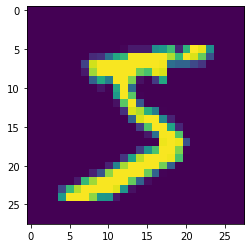

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train=X_train/255
X_test=X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [32]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.1532 - val_accuracy: 0.9755
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.1934 - val_accuracy: 0.9714
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0095 - accuracy: 0.9966 - val_loss: 0.1709 - val_accuracy: 0.9762
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.1633 - val_accuracy: 0.9747
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0083 - accuracy: 0.9975 - val_loss: 0.1944 - val_accuracy: 0.9735
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.1639 - val_accuracy: 0.9757
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.1636 - val_accuracy:

In [33]:
y_probab=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
y_probab

array([[1.9796875e-09, 3.5277491e-12, 5.6044757e-07, ..., 9.9998683e-01,
        4.6230222e-10, 4.6510524e-07],
       [1.2952904e-13, 1.6061099e-06, 9.9999827e-01, ..., 2.6031713e-18,
        1.0444200e-10, 6.5833675e-15],
       [8.9591545e-08, 9.9983931e-01, 6.4102546e-06, ..., 1.3201806e-04,
        1.5803951e-05, 7.2145428e-07],
       ...,
       [4.7324271e-16, 5.1444390e-14, 4.1211806e-17, ..., 1.5835816e-08,
        2.2818356e-09, 7.4438810e-07],
       [4.9842912e-14, 1.5270188e-14, 3.5542582e-15, ..., 2.8954601e-16,
        3.0721015e-08, 5.2355289e-15],
       [5.3073145e-12, 1.4468841e-13, 2.6408246e-13, ..., 1.9698413e-20,
        3.8266268e-15, 9.7479876e-16]], dtype=float32)

In [34]:
y_pred=y_probab.argmax(axis=1)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9792

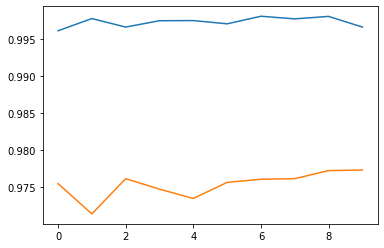

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

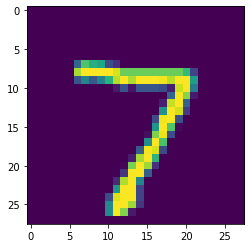

In [41]:
plt.imshow(X_test[0])

In [42]:
model.predict(X_test[0]).argmax(axis=1)

1/1 [==============================] - 0s 27ms/step


array([7])